In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

import pandas as pd
import shap

In [2]:
iris = load_iris()
X_train, X_val, y_train, y_val = train_test_split(
    iris.data, iris.target, random_state=49
)

feature_names = iris.feature_names
X_train = pd.DataFrame(X_train, columns=feature_names)
X_val = pd.DataFrame(X_val, columns=feature_names)

gbrt = GradientBoostingRegressor(max_depth=6)

In [3]:
param_space = {
    'max_depth': (2, 10)
}

grid_search = GridSearchCV(gbrt, param_space, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print('Best_Score', grid_search.best_score_)
print('Best_Params', grid_search.best_params_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best_Score 0.9415426784197546
Best_Params {'max_depth': 10}


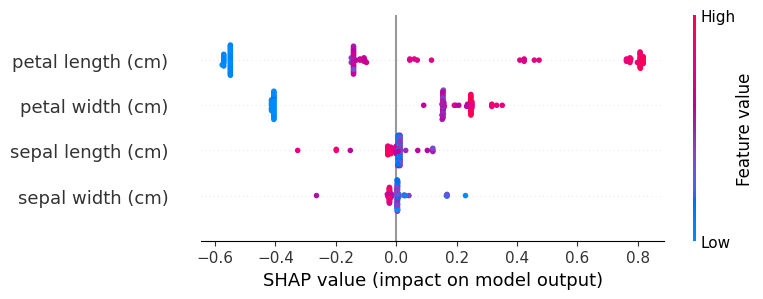

In [4]:
best_gbrt = grid_search.best_estimator_
explainer = shap.Explainer(best_gbrt, X_train)
shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train)

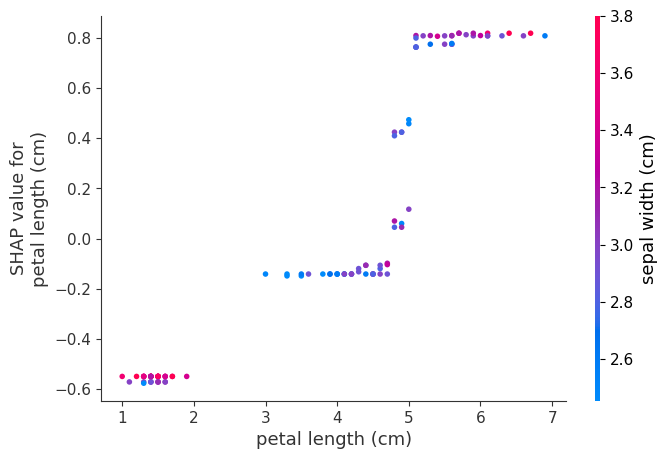

In [5]:
shap.dependence_plot('petal length (cm)', shap_values.values, X_train)

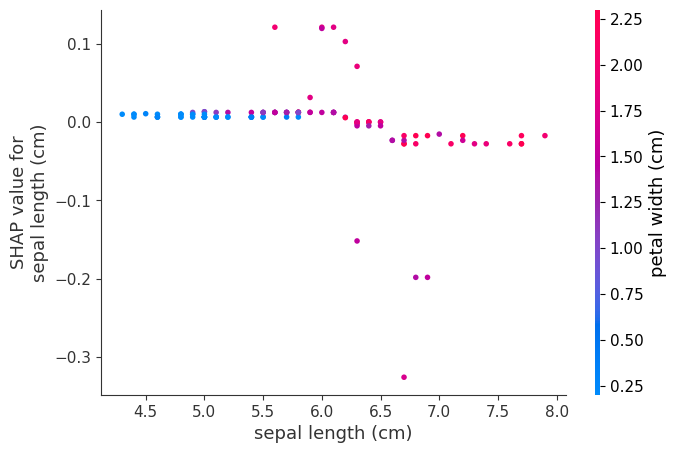

In [6]:
shap.dependence_plot('sepal length (cm)', shap_values.values, X_train)

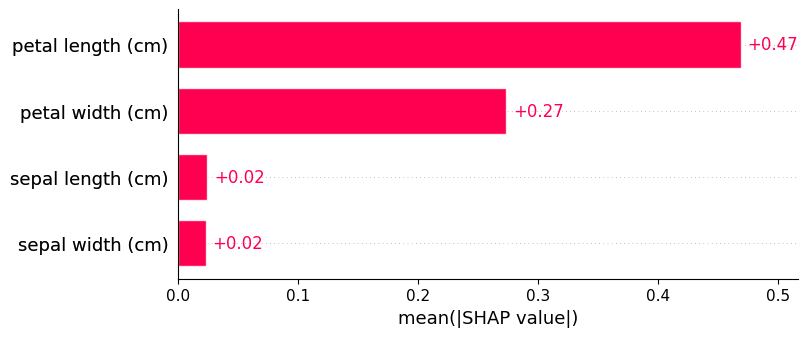

In [7]:
shap.plots.bar(shap_values)

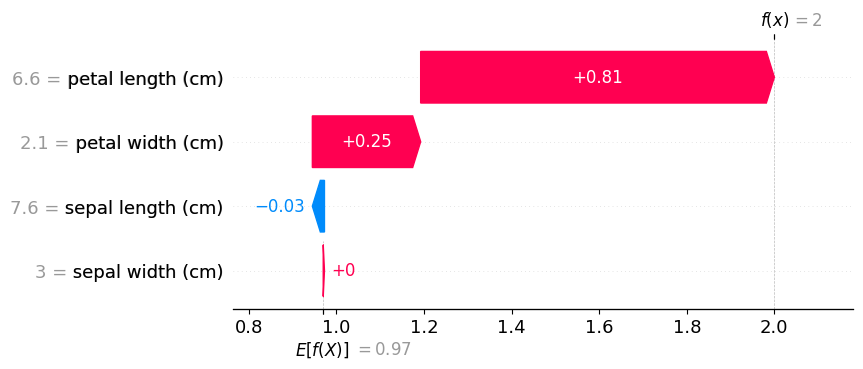

In [8]:
shap.plots.waterfall(shap_values[0])